In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
#from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
sns.set()

In [7]:
data  = pd.read_csv("./dataset/combined_csv/train/combined.csv")
#data.drop(columns="id",inplace=True)

In [8]:
data.shape

(5598, 29)

In [9]:
data.head()

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,...,tt4,t4u,fti,tbg,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,0,55.0,1.0,0,0,0,1,0,0,0,...,73.0,0.76,96.0,NaN,1,0,0,0,1,0
1,1,58.0,1.0,0,0,0,0,0,0,0,...,64.0,0.69,93.0,NaN,4,0,0,0,1,0
2,2,36.0,0.0,0,0,0,0,0,0,0,...,123.0,1.16,107.0,NaN,4,0,0,0,0,1
3,3,51.0,0.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,4,0,0,0,0,1
4,4,64.0,0.0,0,0,0,0,0,0,0,...,123.0,1.23,100.0,NaN,4,0,1,0,0,0


In [10]:
data.describe()

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,...,tt4,t4u,fti,tbg,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,5598.000000,5596.000000,5378.000000,5598.000000,5598.000000,5598.000000,5598.000000,5598.000000,5598.000000,5598.000000,...,5230.000000,5004.000000,5008.000000,0.0,5598.000000,5598.000000,5598.000000,5598.000000,5598.000000,5598.000000
mean,2798.500000,51.848106,0.319821,0.117899,0.014291,0.012147,0.039300,0.014648,0.013934,0.017149,...,109.066310,0.997855,110.788698,NaN,3.910325,0.032512,0.097892,0.011075,0.275456,0.583065
std,1616.147735,20.461961,0.466451,0.322518,0.118698,0.109553,0.194325,0.120150,0.117226,0.129838,...,35.394456,0.194389,32.887250,NaN,0.539818,0.177370,0.297195,0.104665,0.446783,0.493096
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.310000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1399.250000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,88.000000,0.880000,93.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2798.500000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,104.000000,0.980000,107.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4197.750000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,125.000000,1.080000,124.000000,NaN,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5597.000000,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,430.000000,2.120000,395.000000,NaN,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, data[column][data[column]=='?'].count())
    



## Also, looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not. Let's see an example:

In [12]:
data.drop(['tsh_measured','t3_measured','tt4_measured','t4u_measured','fti_measured','tbg_measured'],axis =1,inplace=True)

KeyError: "['tsh_measured' 't3_measured' 'tt4_measured' 't4u_measured' 'fti_measured'\n 'tbg_measured'] not found in axis"

In [ ]:
# Now let's replace the '?' values with numpy nan
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)    

In [15]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count==0:
        print(column, data[column][data[column]=='?'].count())    

Unnamed: 0 0
age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
i131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
tsh 0
t3 0
tt4 0
t4u 0
fti 0
tbg 0
class 0
referral_source_STMW 0
referral_source_SVHC 0
referral_source_SVHD 0
referral_source_SVI 0
referral_source_other 0


In [16]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)

In [17]:
data.isna().sum()

Unnamed: 0                      0
age                             2
sex                           220
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
i131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
tsh                           568
t3                           1170
tt4                           368
t4u                           594
fti                           590
tbg                          5598
class                           0
referral_source_STMW            0
referral_source_SVHC            0
referral_source_SVHD            0
referral_source_SVI             0
referral_source_other           0
dtype: int64

In [18]:
#WE have 3 unique values in sex column
data['sex'].unique()

array([ 1.,  0., nan])

In [19]:
data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [20]:
len(data['on_antithyroid_medication'].unique())
data['on_antithyroid_medication'].unique()

array([0, 1], dtype=int64)

In [21]:
# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, let's do a smarter work
for column in data.columns:
    if  len(data[column].unique())==2:
        data[column] = data[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns as we require. Now there are handful of column left with more than 2 categories. 


In [22]:
data

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,...,tt4,t4u,fti,tbg,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,0.76,96.0,NaN,1,NaN,NaN,NaN,NaN,NaN
1,1,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,0.69,93.0,NaN,4,NaN,NaN,NaN,NaN,NaN
2,2,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.0,1.16,107.0,NaN,4,NaN,NaN,NaN,NaN,NaN
3,3,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
4,4,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.0,1.23,100.0,NaN,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,5593,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
5594,5594,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,1.03,95.0,NaN,4,NaN,NaN,NaN,NaN,NaN
5595,5595,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187.0,0.96,194.0,NaN,4,NaN,NaN,NaN,NaN,NaN
5596,5596,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,0.65,116.0,NaN,4,NaN,NaN,NaN,NaN,NaN


In [25]:
# we will use get_dummies with that. this column has more than 2 unique values
data = pd.get_dummies(data, columns=['referral_source'])

KeyError: "None of [Index(['referral_source'], dtype='object')] are in the [columns]"

In [27]:
data['class'].unique()

array([1, 4, 5, 0, 3, 6, 2], dtype=int64)

In [28]:
lblEn = LabelEncoder()

data['class'] =lblEn.fit_transform(data['class'])

In [29]:
data

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,...,tt4,t4u,fti,tbg,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,0.76,96.0,NaN,1,NaN,NaN,NaN,NaN,NaN
1,1,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,0.69,93.0,NaN,4,NaN,NaN,NaN,NaN,NaN
2,2,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.0,1.16,107.0,NaN,4,NaN,NaN,NaN,NaN,NaN
3,3,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
4,4,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.0,1.23,100.0,NaN,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,5593,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
5594,5594,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,1.03,95.0,NaN,4,NaN,NaN,NaN,NaN,NaN
5595,5595,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187.0,0.96,194.0,NaN,4,NaN,NaN,NaN,NaN,NaN
5596,5596,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,0.65,116.0,NaN,4,NaN,NaN,NaN,NaN,NaN


In [30]:
data.describe(include='all')

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,...,tt4,t4u,fti,tbg,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,5598.000000,5596.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5230.000000,5004.000000,5008.000000,0.0,5598.000000,0.0,0.0,0.0,0.0,0.0
mean,2798.500000,51.848106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.066310,0.997855,110.788698,NaN,3.910325,NaN,NaN,NaN,NaN,NaN
std,1616.147735,20.461961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.394456,0.194389,32.887250,NaN,0.539818,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,0.310000,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1399.250000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.000000,0.880000,93.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,2798.500000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.000000,0.980000,107.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,4197.750000,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,125.000000,1.080000,124.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
max,5597.000000,455.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,430.000000,2.120000,395.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


In [31]:
'''from pandas_profiling import ProfileReport

pf = ProfileReport(data)
pf.to_widgets()
'''

'from pandas_profiling import ProfileReport\n\npf = ProfileReport(data)\npf.to_widgets()\n'

In [32]:
len(data.columns)

29

In [33]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

ValueError: Shape of passed values is (5598, 8), indices imply (5598, 29)

In [62]:
data  = pd.read_csv("./dataset/combined_csv/train/combined.csv")

In [63]:
data.head()

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,...,tt4,t4u,fti,tbg,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,0,55.0,1.0,0,0,0,1,0,0,0,...,73.0,0.76,96.0,NaN,1,0,0,0,1,0
1,1,58.0,1.0,0,0,0,0,0,0,0,...,64.0,0.69,93.0,NaN,4,0,0,0,1,0
2,2,36.0,0.0,0,0,0,0,0,0,0,...,123.0,1.16,107.0,NaN,4,0,0,0,0,1
3,3,51.0,0.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,4,0,0,0,0,1
4,4,64.0,0.0,0,0,0,0,0,0,0,...,123.0,1.23,100.0,NaN,4,0,1,0,0,0


In [64]:
data = data.drop(columns=['Unnamed: 0',"tbg"])

In [65]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,t3,tt4,t4u,fti,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,55.0,1.0,0,0,0,1,0,0,0,1,...,0.3,73.0,0.76,96.0,1,0,0,0,1,0
1,58.0,1.0,0,0,0,0,0,0,0,0,...,1.7,64.0,0.69,93.0,4,0,0,0,1,0
2,36.0,0.0,0,0,0,0,0,0,0,0,...,NaN,123.0,1.16,107.0,4,0,0,0,0,1
3,51.0,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,4,0,0,0,0,1
4,64.0,0.0,0,0,0,0,0,0,0,0,...,2.8,123.0,1.23,100.0,4,0,1,0,0,0


In [67]:
data.isna().sum()

age                             2
sex                           220
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
i131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
tsh                           568
t3                           1170
tt4                           368
t4u                           594
fti                           590
class                           0
referral_source_STMW            0
referral_source_SVHC            0
referral_source_SVHD            0
referral_source_SVI             0
referral_source_other           0
dtype: int64

In [68]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [69]:
len(data.columns)

27

In [70]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'i131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'tsh', 't3', 'tt4', 't4u',
       'fti', 'class', 'referral_source_STMW', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other'],
      dtype='object')

In [73]:
new_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
i131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
tsh                          0
t3                           0
tt4                          0
t4u                          0
fti                          0
class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

In [8]:
import pandas as pd
df1 = pd.read_csv("G:\\THYROID DETECTION\\thyroid-detection\\src\dataset\\preprocessed\\train\\preprocessed.csv")
df1

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,t3,tt4,t4u,fti,class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,55.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,73.0,1.0,96.0,4,0.0,0.0,0.0,1.0,0.0
1,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,64.0,1.0,93.0,4,0.0,0.0,0.0,1.0,0.0
2,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,123.0,1.0,107.0,4,0.0,0.0,0.0,0.0,1.0
3,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,95.0,1.0,101.0,4,0.0,0.0,0.0,0.0,1.0
4,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,123.0,1.0,100.0,4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37102,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,48.0,1.0,54.0,6,0.0,0.0,0.0,0.0,1.0
37103,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,48.0,1.0,54.0,6,0.0,0.0,0.0,0.0,1.0
37104,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,48.0,1.0,54.0,6,0.0,0.0,0.0,0.0,1.0
37105,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,48.0,1.0,54.0,6,0.0,0.0,0.0,0.0,1.0


In [73]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df1[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'i131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'tsh', 't3', 'tt4', 't4u',
       'fti', 'referral_source_STMW', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other']]
y = df1["class"]

# columns = ['age','tsh','t3','tt4','t4u','fti']
# for column in columns:
#     x[column] = np.log(1 + x[column])


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42,stratify = y)
#print(y_train.value_counts(normalize=True),y_test.value_counts(normalize=True))
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train))
predict = dt.predict(x_test)
score = dt.score(x_test, y_test)
print(score)
y_pred = dt.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)
confusion_matrix(y_test, y_pred)


0.9920498568300489
0.9907033144704931
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       0.97      1.00      0.99      1060
           2       1.00      1.00      1.00      1060
           3       0.99      1.00      0.99      1061
           4       1.00      0.93      0.97      1060
           5       0.98      1.00      0.99      1060
           6       1.00      1.00      1.00      1061

    accuracy                           0.99      7422
   macro avg       0.99      0.99      0.99      7422
weighted avg       0.99      0.99      0.99      7422



array([[1060,    0,    0,    0,    0,    0,    0],
       [   0, 1060,    0,    0,    0,    0,    0],
       [   0,    0, 1060,    0,    0,    0,    0],
       [   0,    0,    0, 1061,    0,    0,    0],
       [   1,   29,    1,   15,  991,   23,    0],
       [   0,    0,    0,    0,    0, 1060,    0],
       [   0,    0,    0,    0,    0,    0, 1061]], dtype=int64)

In [72]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
p = lr.predict(x_test)
report = classification_report(y_test, p)
print(report)
confusion_matrix(y_test, p)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1060
           1       0.87      0.86      0.87      1060
           2       1.00      1.00      1.00      1060
           3       0.97      1.00      0.98      1061
           4       0.92      0.82      0.86      1060
           5       0.91      0.94      0.92      1060
           6       1.00      1.00      1.00      1061

    accuracy                           0.95      7422
   macro avg       0.94      0.95      0.94      7422
weighted avg       0.94      0.95      0.94      7422



F:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


array([[1060,    0,    0,    0,    0,    0,    0],
       [   5,  913,    0,    0,   78,   64,    0],
       [   0,    0, 1060,    0,    0,    0,    0],
       [   0,    0,    0, 1061,    0,    0,    0],
       [  42,   67,    4,   38,  866,   38,    5],
       [   0,   66,    0,    0,    0,  994,    0],
       [   0,    0,    0,    0,    0,    0, 1061]], dtype=int64)

In [255]:
import pandas as pd
df1 = pd.read_csv("G:\\THYROID DETECTION\\thyroid-detection\\src\\gg.csv")
df = df1.copy()
x = pd.DataFrame({'x':[1.9535435,2.7,4.6]})
y = x.round(2)
y

,x
0,1.95
1,2.70
2,4.60


<AxesSubplot:>

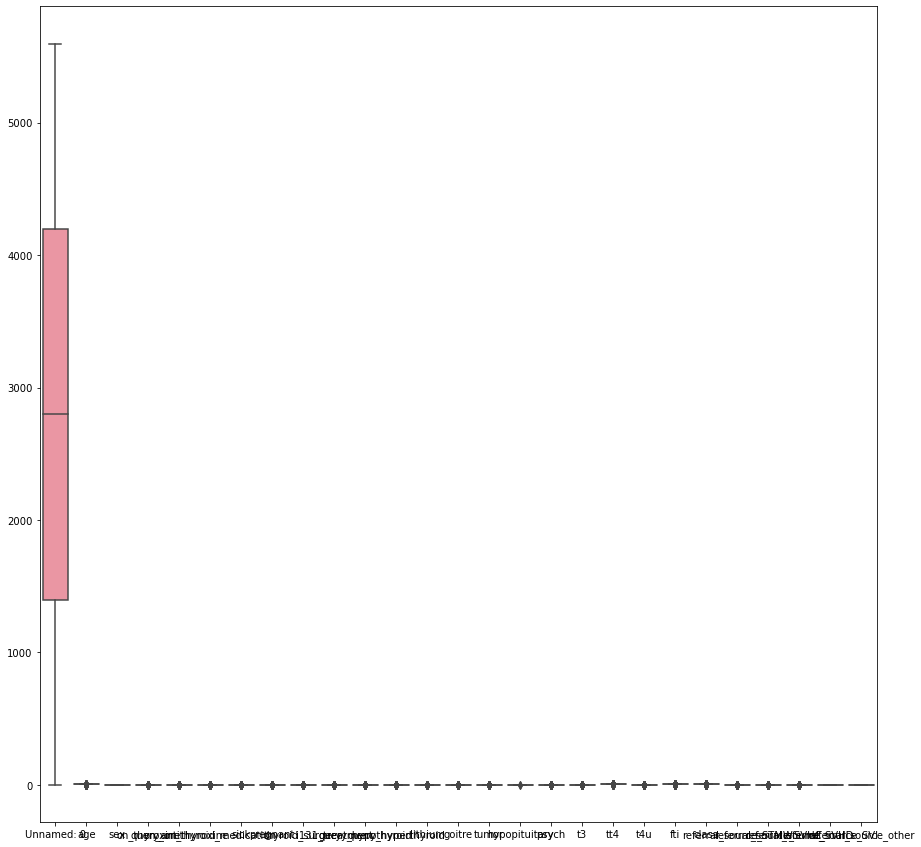

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy 

columns = ['age','t3','tt4','t4u','fti']
for column in columns:
    df[column] = numpy.round(numpy.log(1 + df[column]),4)

fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = df  , ax=ax)

<AxesSubplot:>

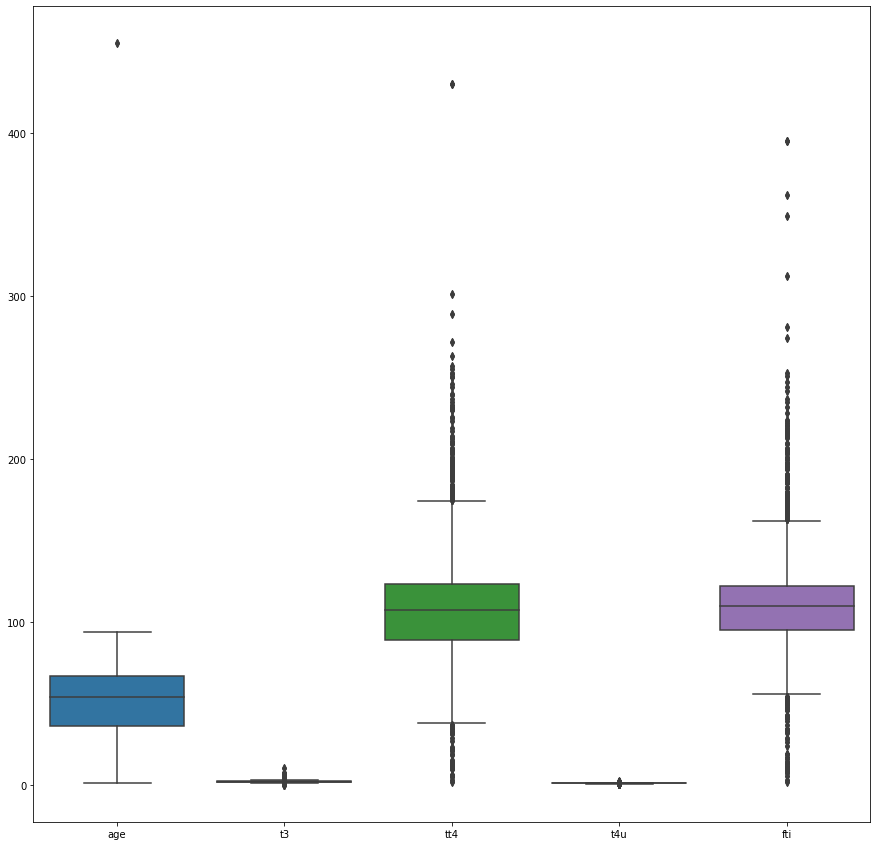

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
 
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = df  , ax=ax)

In [245]:
q = df['age'].quantile(.9995)
df_new = df[df['age'] < q]

#df_new
q = df_new['tt4'].quantile(.95)
df_new = df_new[df['tt4'] < q]

q = df_new['tt4'].quantile(.014)
df_new = df_new[df['tt4'] > q]

q = df_new['fti'].quantile(.95)
df_new = df_new[df['fti'] < q]

q = df_new['fti'].quantile(.01)
df_new = df_new[df['fti'] > q]

# q = df_new['t3'].quantile(.98)
# df_new = df_new[df['t3'] < q]

# q = df_new['t3'].quantile(.008)
# df_new = df_new[df['t3'] > q]

# q = df_new['t4u'].quantile(.985)
# df_new = df_new[df['t4u'] < q]

df_new
# X = df_new.drop(columns="class")
# Y = df_new.iloc[:,:-1]
# print(Y)
# from imblearn.over_sampling import RandomOverSampler
# rdsmple = RandomOverSampler(random_state=42)
# x_sampled,y_sampled  = rdsmple.fit_resample(X,Y)

<ipython-input-245-99b2ce31034b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[df['tt4'] < q]
<ipython-input-245-99b2ce31034b>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[df['tt4'] > q]
<ipython-input-245-99b2ce31034b>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[df['fti'] < q]
<ipython-input-245-99b2ce31034b>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[df['fti'] > q]


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg,referral_source,class
0,55.0,M,f,f,f,t,f,f,f,t,...,t,73.00000,t,0.760000,t,96.000000,f,?,SVI,negative
1,58.0,M,f,f,f,f,f,f,f,f,...,t,64.00000,t,0.690000,t,93.000000,f,?,SVI,negative
2,36.0,F,f,f,f,f,f,f,f,f,...,t,123.00000,t,1.160000,t,107.000000,f,?,other,negative
3,51.0,F,f,f,f,f,f,f,f,f,...,f,109.06631,f,0.997855,f,110.788698,f,?,other,negative
4,64.0,F,f,f,f,f,f,f,f,f,...,t,123.00000,t,1.230000,t,100.000000,f,?,SVHC,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,58.0,F,t,f,f,f,f,f,f,f,...,t,123.00000,t,0.930000,t,132.000000,f,?,other,negative
5593,15.0,F,f,f,t,f,f,f,f,f,...,f,109.06631,f,0.997855,f,110.788698,f,?,other,negative
5594,61.0,F,f,f,f,f,f,f,f,f,...,t,97.00000,t,1.030000,t,95.000000,f,?,other,negative
5596,55.0,F,f,f,f,f,f,f,f,f,...,t,76.00000,t,0.650000,t,116.000000,f,?,SVHC,negative


<AxesSubplot:>

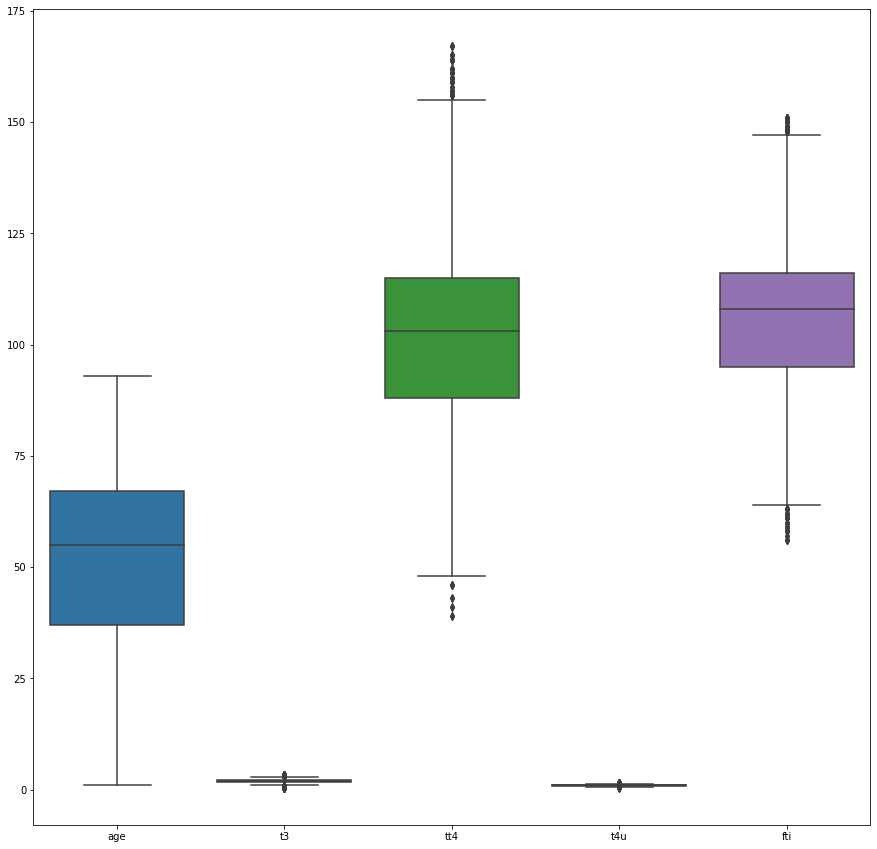

In [227]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = df_new  , ax=ax)

In [229]:
df_new['class'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'T3 toxic', 'goitre'], dtype=object)

In [232]:
df1[df1['class'] == 'secondary hypothyroid']

,id,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,...,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg,referral_source,class
2165,1504,41.0,M,f,f,f,f,f,f,f,...,t,22.0,f,NaN,f,NaN,f,?,other,secondary hypothyroid
4383,2734,46.0,F,f,f,f,f,f,f,f,...,t,48.0,t,0.89,t,54.0,f,?,other,secondary hypothyroid


In [234]:
# import numpy
# df2 = pd.DataFrame()
# df2['t4u'] = df1['t4u']
# df2['t4u_log'] = numpy.round(numpy.log(1 + df2['t4u']),4)
# df2['t4u_log']

df_new

# import math
# math.log10(1.85)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg,referral_source,class
1,58.0,M,f,f,f,f,f,f,f,f,...,t,64.00000,t,0.690000,t,93.000000,f,?,SVI,negative
2,36.0,F,f,f,f,f,f,f,f,f,...,t,123.00000,t,1.160000,t,107.000000,f,?,other,negative
3,51.0,F,f,f,f,f,f,f,f,f,...,f,109.06631,f,0.997855,f,110.788698,f,?,other,negative
4,64.0,F,f,f,f,f,f,f,f,f,...,t,123.00000,t,1.230000,t,100.000000,f,?,SVHC,negative
5,53.0,F,f,f,f,f,f,f,f,f,...,t,125.00000,f,0.997855,f,110.788698,f,?,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,58.0,F,t,f,f,f,f,f,f,f,...,t,123.00000,t,0.930000,t,132.000000,f,?,other,negative
5593,15.0,F,f,f,t,f,f,f,f,f,...,f,109.06631,f,0.997855,f,110.788698,f,?,other,negative
5594,61.0,F,f,f,f,f,f,f,f,f,...,t,97.00000,t,1.030000,t,95.000000,f,?,other,negative
5596,55.0,F,f,f,f,f,f,f,f,f,...,t,76.00000,t,0.650000,t,116.000000,f,?,SVHC,negative


In [202]:
# import numpy
# columns = ['age','t3','tt4','t4u','fti']
# for column in columns:
#     df_new[column] = numpy.round(numpy.log(1 + df_new[column]),4)

# fig, ax = plt.subplots(figsize = (15,15))
# sns.boxplot(data = df_new  , ax=ax)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

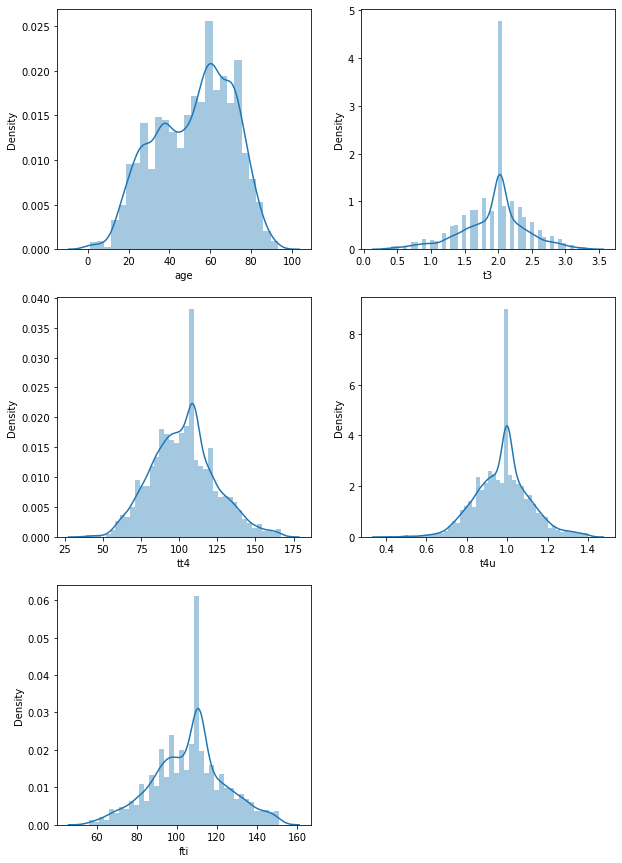

In [223]:
import matplotlib.pyplot as plot
columns = ['age','t3','tt4','t4u','fti']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(df_new[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

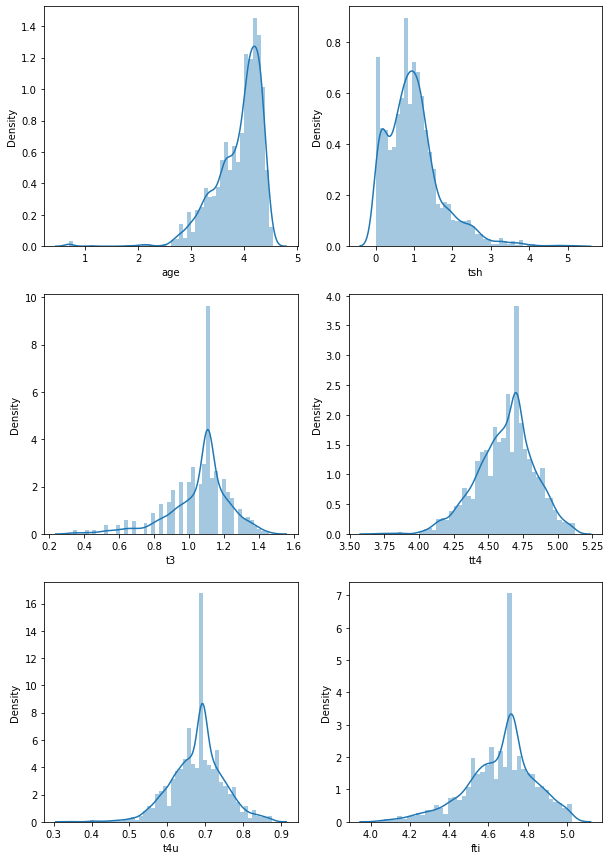

In [ ]:
plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    df_new[column]+=1
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(np.log(df_new[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()


<AxesSubplot:>

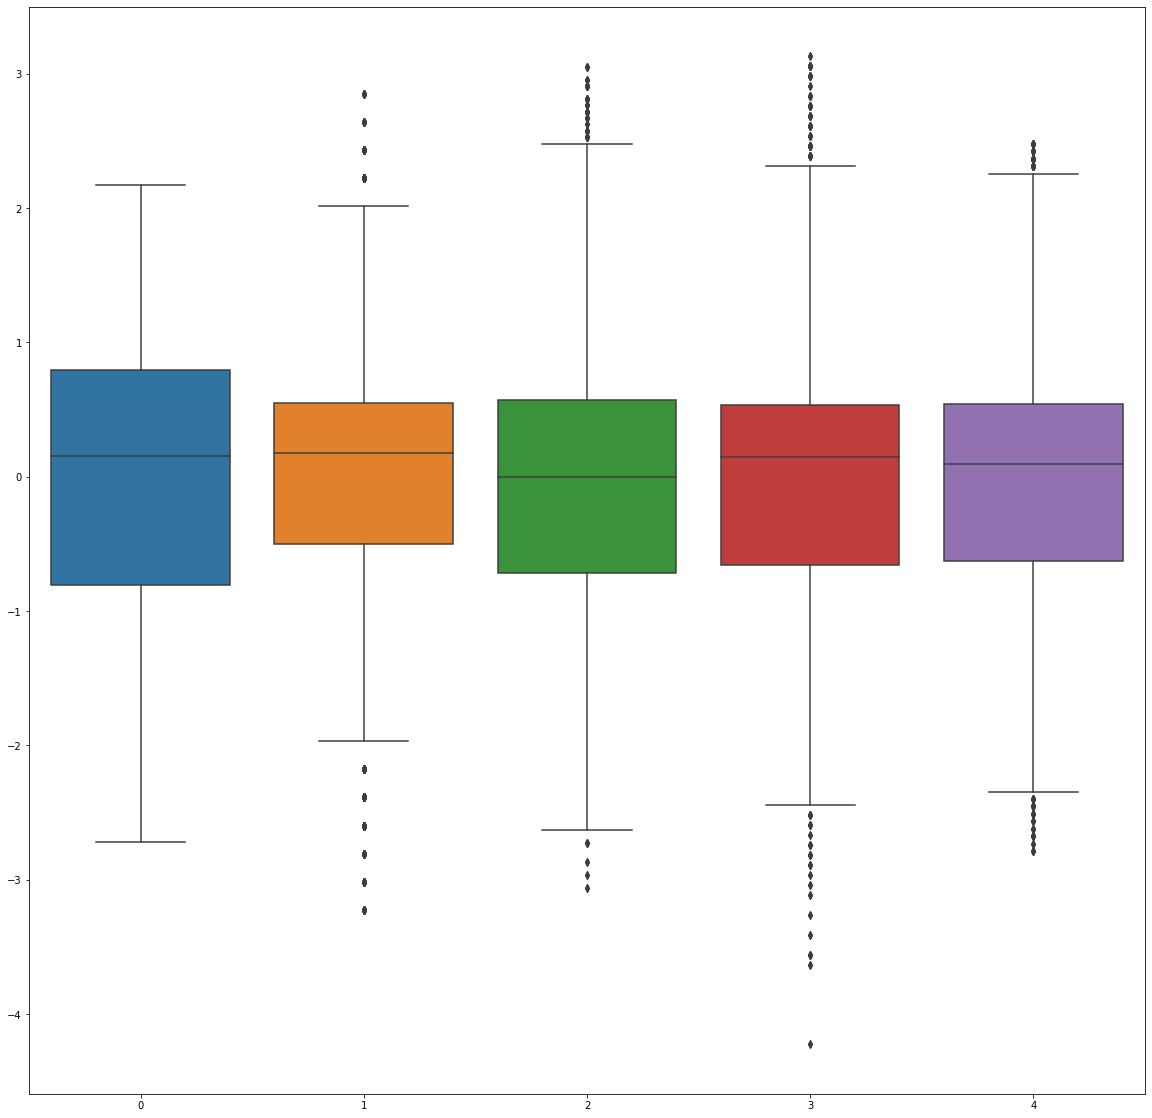

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

d = df_new[['age','t3','tt4','t4u','fti']]
df_new_scalar = pd.DataFrame(scaler.fit_transform(d))
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scalar, ax=ax)

# fig, ax = plt.subplots(figsize = (15,15))
# sns.boxplot(data = d  , ax=ax)